In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [66]:
data = pd.read_csv("gait.csv")

In [46]:
df = data.copy()

In [47]:
df

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399
...,...,...,...,...,...,...,...
181795,10,3,10,2,3,96,29.778412
181796,10,3,10,2,3,97,29.247559
181797,10,3,10,2,3,98,28.796951
181798,10,3,10,2,3,99,28.432936


In [48]:
df.shape    #181800 -- rows , 7 -- columns

(181800, 7)

In [49]:
df = df.reindex(columns=['subject', 'replication','leg', 'joint','time', 'angle','condition'])

In [50]:
df #reindexed cols

,subject,replication,leg,joint,time,angle,condition
0,1,1,1,1,0,4.682881,1
1,1,1,1,1,1,5.073127,1
2,1,1,1,1,2,5.229774,1
3,1,1,1,1,3,5.083273,1
4,1,1,1,1,4,4.652399,1
...,...,...,...,...,...,...,...
181795,10,10,2,3,96,29.778412,3
181796,10,10,2,3,97,29.247559,3
181797,10,10,2,3,98,28.796951,3
181798,10,10,2,3,99,28.432936,3


In [51]:
df.isna().sum() #no Nan Values

subject        0
replication    0
leg            0
joint          0
time           0
angle          0
condition      0
dtype: int64

In [52]:
condition_map = {1: 0, 2 : 1,3 : 2}
df['condition'] = df['condition'].map(condition_map)   #mapping target column as 1: 0, 2 : 1,3 : 2 (condition)

In [53]:
df.shape

(181800, 7)

In [54]:
X = df.iloc[:,0:-1]   # subject replication leg joint time angle
y = df.iloc[:,-1]     # condition

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
print(X_train.shape)
print(X_test.shape)

(127260, 6)
(54540, 6)


# RandomForestClassifier

In [59]:
c

{'classifier__max_depth': 30, 'classifier__n_estimators': 120, 'pca__n_components': 5}
0.5395568128241395


In [62]:
y_pred = grid.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.5644481114778145


# Support vector time Taking

# LOGISTIC REGRESSION

In [37]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

param_grid = {
    'pca__n_components': [6],
    'logreg__C': [1],
    'logreg__penalty': ['l2']
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'logreg__C': 1, 'logreg__penalty': 'l2', 'pca__n_components': 6}
0.38521923620933524


In [38]:
y_pred = grid.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.3831683168316832


# Neural Network

In [80]:
from keras.models import Sequential
from keras.layers import Dense

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('model', Sequential([
        Dense(64, input_dim=6, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ]))
])

# Compile the model
pipeline.named_steps['model'].compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
pipeline.fit(X_train, y_train, model__epochs=20, model__batch_size=80, model__validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = pipeline.named_steps['model'].evaluate(X_test, y_test)
print('Accuracy:', accuracy)


# Use the model for prediction
#X_new = np.random.rand(5, 10)
#y_pred = pipeline.predict(X_new)
#print(y_pred)

Epoch 1/20
1591/1591 [==============================] - 7s 5ms/step - loss: 1.0445 - accuracy: 0.4183 - val_loss: 19.2340 - val_accuracy: 0.3268
Epoch 2/20
1591/1591 [==============================] - 8s 5ms/step - loss: 0.9986 - accuracy: 0.4515 - val_loss: 26.3587 - val_accuracy: 0.3145
Epoch 3/20
1591/1591 [==============================] - 8s 5ms/step - loss: 0.9677 - accuracy: 0.4716 - val_loss: 38.7646 - val_accuracy: 0.3336
Epoch 4/20
1591/1591 [==============================] - 8s 5ms/step - loss: 0.9431 - accuracy: 0.4907 - val_loss: 53.8442 - val_accuracy: 0.3302
Epoch 5/20
1591/1591 [==============================] - 8s 5ms/step - loss: 0.9257 - accuracy: 0.5008 - val_loss: 72.8263 - val_accuracy: 0.3155
Epoch 6/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.9124 - accuracy: 0.5091 - val_loss: 85.2487 - val_accuracy: 0.3373
Epoch 7/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.9026 - accuracy: 0.5160 - val_loss: 95.7623 - val_ac

# Naive Bayes

In [97]:
pipe = Pipeline([
    ('scaler', StandardScaler()),                      #first it will standardize the data then 
    ('pca', PCA()),                                    #it will reduce the dimensions
    ('classifier', GaussianNB())                       #then it will apply Naive Bayes
])

param_grid = {
    'pca__n_components': [5],
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 5}
0.37162501964482164


In [98]:
y_pred = grid.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.36998533186652


# Perceptron

In [95]:
pipe = Pipeline([
    ('scaler', StandardScaler()), # Apply standard scaling to the features
    ('pca', PCA()), # Reduce the dimensionality using PCA
    ('classifier', Perceptron()) # Use Perceptron as the classifier instead of GaussianNB
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [1,2,3,4,5,6], # Tune the number of components for PCA
    'classifier__eta0': [0.01, 0.1, 1], # Tune the learning rate for Perceptron
    'classifier__max_iter': [1000, 2000, 3000] # Tune the maximum number of iterations for Perceptron
}

# Create the GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the pipeline on the train set using GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)

{'classifier__eta0': 0.01, 'classifier__max_iter': 1000, 'pca__n_components': 6}
0.3406804966210907


In [96]:
y_pred = grid.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.33562522918958565


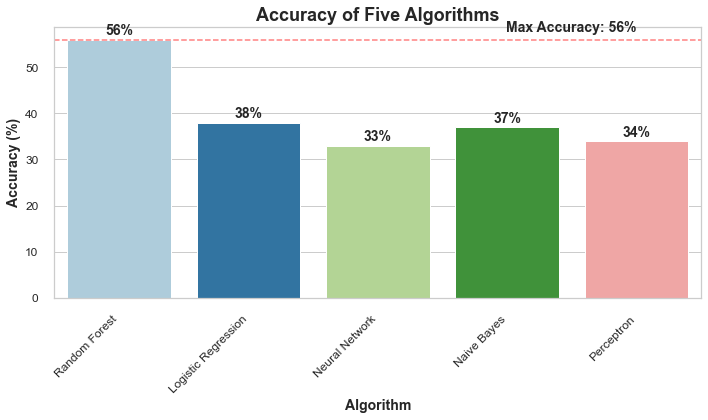

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of algorithms and their accuracy
algorithms = ['Random Forest', 'Logistic Regression', 'Neural Network', 'Naive Bayes', 'Perceptron']
accuracy = [56, 38, 33, 37, 34]

# Create a dictionary with the data
data = {'Algorithm': algorithms, 'Accuracy': accuracy}

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)

# Set the style of the plot
sns.set_style('whitegrid')
sns.set_palette('Paired')

# Set the figure size
plt.figure(figsize=(10,6))

# Create a bar plot using Seaborn
ax = sns.barplot(x='Algorithm', y='Accuracy', data=df)

# Add labels to the plot
ax.set_title('Accuracy of Five Algorithms', fontsize=18, fontweight='bold')
ax.set_xlabel('Algorithm', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12, pad=10)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add text annotations to the bars
for i in range(len(algorithms)):
    ax.text(i, accuracy[i]+1, str(accuracy[i])+'%', ha='center', fontsize=14, fontweight='bold')

# Add a horizontal line to the plot
ax.axhline(y=max(accuracy), color='red', alpha=0.5, linestyle='--')
ax.text(len(algorithms)-1, max(accuracy)+1, 'Max Accuracy: '+str(max(accuracy))+'%', ha='right', va='bottom', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()